In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore

In [2]:
import os

In [3]:
os.getcwd

<function nt.getcwd()>

In [4]:
os.listdir()

['.biojs_templates',
 '.conda',
 '.condarc',
 '.config',
 '.ipynb_checkpoints',
 '.ipython',
 '.jalview_properties',
 '.jswingreader',
 '.jupyter',
 '.matplotlib',
 '.oracle_jre_usage',
 '.vamsas',
 '3D Objects',
 'AirQuality from UCI..ipynb',
 'anaconda3',
 'AppData',
 'Application Data',
 'Binomial distribution.ipynb',
 'car prediction models replica.ipynb',
 'car prediction models.ipynb',
 'Charts.ipynb',
 'Contacts',
 'Cookies',
 'Creative Cloud Files',
 'Data visualization practice line graph, bar chart, title, label, size.ipynb',
 'Desktop',
 'Distributions.ipynb',
 'Documents',
 'Downloads',
 'EDA.ipynb',
 'Favorites',
 'first draft Talking_point csv Bagging and boosting .ipynb',
 'General practice of coding.ipynb',
 'hahahahaha.txt',
 'IntelGraphicsProfiles',
 'KNN algorithm.ipynb',
 'KNN and NB  first draft.ipynb',
 'Linear Regression Project submit 2 Edwin.ipynb',
 'Linear Regression.ipynb',
 'Links',
 'Local Settings',
 'Logistic Regression Assignment 2021. (Final).ipynb',
 

In [5]:
os.chdir('C:\\Users\\Hasan\\Downloads')

1)

In [6]:
data = pd.read_csv('C:\\Users\\Hasan\\Downloads\\talking_data.txt')

In [7]:
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [9]:
data.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time',
       'is_attributed'],
      dtype='object')

In [10]:
data.shape # 100000 rows and 8 columns

(100000, 8)

In [11]:
data.isnull().values.any() # this means there are missing values

True

2)

In [12]:
columns = ['ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time','is_attributed']
for col in columns:
    unique = data[col].unique()
    print("This is the unique stuff of ",col,unique)
    

This is the unique stuff of  ip [ 87540 105560 101424 ... 153487  34029 185961]
This is the unique stuff of  app [ 12  25  13   3   1   9   2   6  20  14  64   7  15  18  11   8  23  21
  56  28  36  22  26  17  27  10  60  58  19  32  24   4  53 125 204   5
 202  70  47  29  55 103  35  83 208 146 161  46  62  65 110  42 150 266
 151 148  72 310  93  94  71  43  39 170  37  68  54 107 398 160  30 183
 315  45 121  38  82 134  33 233 100  44 109  59  74  61 104  66  67 273
 192  50 118 372  48 232 165  91 123  88 538  49  16 105 536 216 425 117
 551  99  86 101 394  78  95 181  76  34 124 548 108  85 145  79  97  75
  52 215  84  96  81 139 267  80 137 119 474 158 293 122 112 149 363 271
  31 171  87 168 176 347 163 190 486 133 302 268 407 116  92 115 261]
This is the unique stuff of  device [   1    2 3866    0 3032 3543    7   40  385   56 3282  103   16   21
   30    4   59   33  211   20    5  883  154  607  957   37  102  124
 2429   50  116   18  579  188   74  291   36 1482  347

3)

In [13]:
app_unique = data['app'].value_counts()
filtered_unique = app_unique[app_unique>2000]
filtered_unique

3     18279
12    13198
2     11737
9      8992
15     8595
18     8315
14     5359
1      3135
13     2422
8      2004
Name: app, dtype: int64

In [14]:

app_unique = data['app'].value_counts() # all the values
filtered_app=app_unique[app_unique<2000]
filtered_app_required = app_unique[app_unique>2000]
app_id_to_save = filtered_app_required.index.tolist()
print("Theses are the ids to save",app_id_to_save)  # everything less than 2k,     #df.loc[df[column]>2] # with a dataframe use the loc, with a series u dont have to put a loc.
app_id_remove = filtered_app.index.tolist() # To save just the app id value in an array for afor loop
print("The app ids which are less than 2k in the data",app_id_remove)

Theses are the ids to save [3, 12, 2, 9, 15, 18, 14, 1, 13, 8]
The app ids which are less than 2k in the data [21, 11, 26, 23, 6, 64, 7, 20, 25, 28, 24, 27, 19, 10, 22, 17, 29, 32, 5, 151, 36, 150, 4, 47, 56, 35, 55, 58, 94, 37, 45, 93, 62, 183, 82, 83, 60, 107, 65, 160, 72, 39, 38, 46, 110, 208, 44, 33, 103, 68, 43, 109, 66, 232, 170, 125, 59, 74, 76, 84, 202, 50, 117, 95, 67, 88, 119, 101, 215, 134, 86, 315, 75, 16, 61, 273, 146, 310, 121, 34, 42, 181, 53, 52, 108, 48, 81, 363, 139, 394, 176, 122, 49, 80, 79, 54, 425, 71, 104, 161, 266, 30, 158, 137, 118, 87, 204, 165, 149, 85, 70, 148, 261, 267, 192, 133, 190, 268, 171, 293, 486, 551, 168, 105, 233, 302, 78, 112, 115, 116, 372, 123, 124, 548, 100, 163, 99, 97, 96, 31, 347, 91, 538, 474, 536, 216, 407, 145, 271, 398, 92]


In [15]:
booleans = []
for length in data.ip:
    if length >=2000:
        booleans.append(True)
    else:
        booleans.append(False)

In [16]:
booleans[0:5]

[True, True, True, True, True]

In [17]:
len(booleans)

100000

In [18]:
greater_than_two_thousand = pd.Series(booleans)

In [19]:
greater_than_two_thousand.head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [20]:
data[greater_than_two_thousand]

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0
...,...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,2017-11-09 13:25:41,NaN,0
99996,85150,9,1,13,244,2017-11-07 11:25:43,NaN,0
99997,18839,3,1,13,19,2017-11-08 11:38:42,NaN,0
99998,114276,15,1,12,245,2017-11-08 17:55:21,NaN,0


4)

In [21]:
data['click_time'] = pd.to_datetime(data['click_time'])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ip               100000 non-null  int64         
 1   app              100000 non-null  int64         
 2   device           100000 non-null  int64         
 3   os               100000 non-null  int64         
 4   channel          100000 non-null  int64         
 5   click_time       100000 non-null  datetime64[ns]
 6   attributed_time  227 non-null     object        
 7   is_attributed    100000 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 6.1+ MB


In [23]:
data

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0
...,...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,2017-11-09 13:25:41,NaN,0
99996,85150,9,1,13,244,2017-11-07 11:25:43,NaN,0
99997,18839,3,1,13,19,2017-11-08 11:38:42,NaN,0
99998,114276,15,1,12,245,2017-11-08 17:55:21,NaN,0


In [24]:
data['click_time'].apply(lambda x:x.month)

0        11
1        11
2        11
3        11
4        11
         ..
99995    11
99996    11
99997    11
99998    11
99999    11
Name: click_time, Length: 100000, dtype: int64

In [25]:
data['click_time'].apply(lambda x:x.day)

0        7
1        7
2        7
3        7
4        9
        ..
99995    9
99996    7
99997    8
99998    8
99999    7
Name: click_time, Length: 100000, dtype: int64

In [26]:
hour = data['click_time'].apply(lambda x:x.hour)

In [27]:
data['hour'] = hour
print(data)

           ip  app  device  os  channel          click_time attributed_time  \
0       87540   12       1  13      497 2017-11-07 09:30:38             NaN   
1      105560   25       1  17      259 2017-11-07 13:40:27             NaN   
2      101424   12       1  19      212 2017-11-07 18:05:24             NaN   
3       94584   13       1  13      477 2017-11-07 04:58:08             NaN   
4       68413   12       1   1      178 2017-11-09 09:00:09             NaN   
...       ...  ...     ...  ..      ...                 ...             ...   
99995  124883   11       1  19      122 2017-11-09 13:25:41             NaN   
99996   85150    9       1  13      244 2017-11-07 11:25:43             NaN   
99997   18839    3       1  13       19 2017-11-08 11:38:42             NaN   
99998  114276   15       1  12      245 2017-11-08 17:55:21             NaN   
99999  119349   14       1  15      401 2017-11-07 14:32:27             NaN   

       is_attributed  hour  
0                  0  

In [28]:
data['click_time'].apply(lambda x:x.minute)

0        30
1        40
2         5
3        58
4         0
         ..
99995    25
99996    25
99997    38
99998    55
99999    32
Name: click_time, Length: 100000, dtype: int64

In [29]:
day_of_year=data['click_time'].apply(lambda x:x.strftime('%j'))
data['day_of_year']= day_of_year
display(data)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,hour,day_of_year
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0,9,311
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0,13,311
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0,18,311
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0,4,311
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0,9,313
...,...,...,...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,2017-11-09 13:25:41,NaN,0,13,313
99996,85150,9,1,13,244,2017-11-07 11:25:43,NaN,0,11,311
99997,18839,3,1,13,19,2017-11-08 11:38:42,NaN,0,11,312
99998,114276,15,1,12,245,2017-11-08 17:55:21,NaN,0,17,312


In [30]:
data

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,hour,day_of_year
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0,9,311
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0,13,311
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0,18,311
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0,4,311
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0,9,313
...,...,...,...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,2017-11-09 13:25:41,NaN,0,13,313
99996,85150,9,1,13,244,2017-11-07 11:25:43,NaN,0,11,311
99997,18839,3,1,13,19,2017-11-08 11:38:42,NaN,0,11,312
99998,114276,15,1,12,245,2017-11-08 17:55:21,NaN,0,17,312


In [31]:
data['click_time'].apply(lambda x:x.second)

0        38
1        27
2        24
3         8
4         9
         ..
99995    41
99996    43
99997    42
99998    21
99999    27
Name: click_time, Length: 100000, dtype: int64

In [32]:
# data.drop(columns = ['A','B'])

In [33]:
data['day_of_year'].astype(str).astype(int)

0        311
1        311
2        311
3        311
4        313
        ... 
99995    313
99996    311
99997    312
99998    312
99999    311
Name: day_of_year, Length: 100000, dtype: int32

In [34]:
data = data.drop(columns=['click_time','attributed_time'])

In [35]:
data = data.astype({'day_of_year':int})
display(data)

,ip,app,device,os,channel,is_attributed,hour,day_of_year
0,87540,12,1,13,497,0,9,311
1,105560,25,1,17,259,0,13,311
2,101424,12,1,19,212,0,18,311
3,94584,13,1,13,477,0,4,311
4,68413,12,1,1,178,0,9,313
...,...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,0,13,313
99996,85150,9,1,13,244,0,11,311
99997,18839,3,1,13,19,0,11,312
99998,114276,15,1,12,245,0,17,312


5)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [37]:
# data=data.drop(columns = ['attributed_time'])
x = data.drop('is_attributed', axis=1)
y = data['is_attributed']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state=10)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
display(x_train,y_train)

(80000, 7) (20000, 7) (80000,) (20000,)


,ip,app,device,os,channel,hour,day_of_year
31152,74324,12,1,18,259,3,311
33499,115621,3,1,19,137,11,311
18594,98476,15,1,13,111,10,312
97132,83194,13,1,6,477,23,311
56015,40342,18,1,13,439,9,311
...,...,...,...,...,...,...,...
9372,122411,9,1,19,466,10,313
93553,23674,3,1,19,424,13,311
50496,2180,24,2,40,105,15,313
94735,106035,18,1,8,379,7,313


31152    0
33499    0
18594    0
97132    0
56015    0
        ..
9372     0
93553    0
50496    0
94735    0
83209    0
Name: is_attributed, Length: 80000, dtype: int64

In [38]:
y_train.mean()

0.00235

In [39]:
y_test.mean()

0.00195

6)

In [40]:
display(y_train)

31152    0
33499    0
18594    0
97132    0
56015    0
        ..
9372     0
93553    0
50496    0
94735    0
83209    0
Name: is_attributed, Length: 80000, dtype: int64

In [41]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [42]:
from sklearn import datasets
import xgboost as xgb
from numpy import loadtxt
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier


In [43]:
x_train.day_of_year.unique()

array([311, 312, 313, 310])

In [44]:
#from xgboost import XGBClassifier

#xgtrain = xgb.DMatrix(x_train.values,y_train.values)
#xgtest = xgb.DMatrix(x_test.values,y_test.values)
#model.fit(x_train,y_train,verbose=1)

In [45]:
model = XGBClassifier()
model.fit(x_train,y_train,verbose=1)

[19:26:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
import numpy as np
np.set_printoptions(suppress=True)
y_pred = model.predict_proba(x_test)
y_pred[:10]

array([[0.9984431 , 0.00155689],
       [0.9999356 , 0.00006437],
       [0.99991584, 0.00008418],
       [0.9984431 , 0.00155689],
       [0.99968153, 0.00031844],
       [0.9984431 , 0.00155689],
       [0.96962315, 0.03037684],
       [0.9984431 , 0.00155689],
       [0.9984431 , 0.00155689],
       [0.9984431 , 0.00155689]], dtype=float32)

7)

In [47]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification

In [48]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


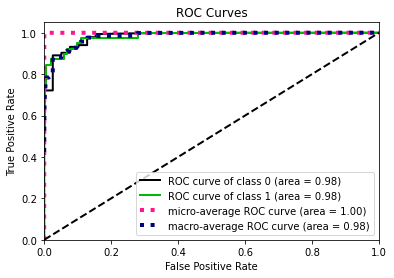

In [49]:
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
skplt.metrics.plot_roc_curve(y_test, y_pred)
plt.show()



In [50]:
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, y_pred[:,1])
print(auc_score1)

0.9826764755375547


8.

In [51]:
import xgboost
print(xgboost.__version__)

1.3.3


[19:26:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature: 0, Score: 0.05043
Feature: 1, Score: 0.06014
Feature: 2, Score: 0.11564
Feature: 3, Score: 0.00800
Feature: 4, Score: 0.46212
Feature: 5, Score: 0.17476
Feature: 6, Score: 0.09018
Feature: 7, Score: 0.03873


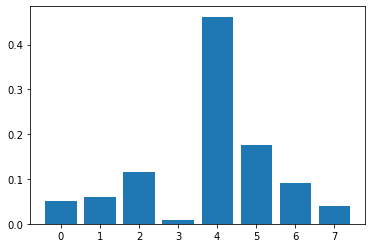

In [53]:
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot
x,y = make_classification(n_samples=80000,n_features=8,n_informative=5,random_state=10)
model = XGBClassifier()
model.fit(x,y)
importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

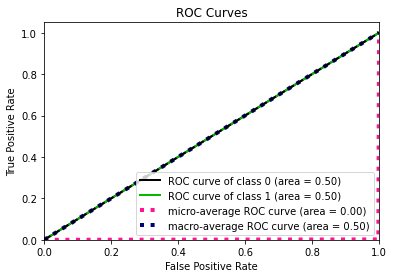

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
x,y = make_classification(n_samples=10000, n_features=7, n_informative=2,n_redundant=0,random_state=10,shuffle=True)
clf = BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=5,random_state=42).fit(x,y)
y_pred_clf = model.predict_proba(x_test)
clf.predict([[0,0,0,0,0,0,0]])
skplt.metrics.plot_roc_curve(y_test, y_pred_bc)
plt.show()


In [71]:
y_pred_clf[:10]

array([[0.9984431 , 0.00155689],
       [0.9999356 , 0.00006437],
       [0.99991584, 0.00008418],
       [0.9984431 , 0.00155689],
       [0.99968153, 0.00031844],
       [0.9984431 , 0.00155689],
       [0.96962315, 0.03037684],
       [0.9984431 , 0.00155689],
       [0.9984431 , 0.00155689],
       [0.9984431 , 0.00155689]], dtype=float32)

In [73]:
from sklearn.metrics import roc_auc_score
auc_score2 = roc_auc_score(y_test, y_pred_clf[:,1])
print(auc_score2)

0.6783092414824291


10

I would choose the XGB classifer over the Bagging classifier. The reason is due to a higher auc - roc score which is seen for XGB classifier. The auc - score turned out to be 0.98 in comparison to bagging classifier's 0.67.

11

In [74]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=10,max_samples=7,bootstrap=True)
bgcl = bgcl.fit(x_train,y_train)
test_pred = bgcl.predict(x_test)
bgcl_score= bgcl.score(x_test,y_test)
print("the bagging classifier model accuracy is {}".format(bgcl_score))
print("the confusion matrix of bagging classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

the bagging classifier model accuracy is 0.99805
the confusion matrix of bagging classifier model is
[[19961     0]
 [   39     0]]


In [75]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=50,learning_rate=0.05)
gbcl = gbcl.fit(x_train,y_train)
test_pred = gbcl.predict(x_test)
gbcl_score=gbcl.score(x_test,y_test)
print("the gradient boost classifier model accuracy is {}".format(gbcl_score))
print("the confusion matrix of gradient boost classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

the gradient boost classifier model accuracy is 0.9977
the confusion matrix of gradient boost classifier model is
[[19952     9]
 [   37     2]]


In [76]:
print('the bagging classifier model accuracy is {}'.format(bgcl_score))
print('the gradient boost classifier model accuracy is {}'.format(gbcl_score))

the bagging classifier model accuracy is 0.99805
the gradient boost classifier model accuracy is 0.9977
